# Exploratory Data Analysis of Freddie Mac's Single Home Loans Dataset

The data is divided into 2 files. Origination files, which contain the information about the loans and the Monthly Performance files which contain how these loans performed over time.
We have summarized the sample data from 2005 - 2016 in order to understand the characteristics of the dataset.
We will be focussing our analysis for dates between Q1,2005 - Q4,20011 so that we can analyze 2 years on either side of 2007-2009. This will give us an understanding of the history and future of the narrow 3 year period of recession.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import os

In [595]:
MAINPATH=os.environ['DATAPATH']
FILENAMEORIG="originationsummary.csv"
FILENAMESUMMARY="performancesummary.csv"

In [111]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 500)

In [623]:
#origcollist=['CREDIT_SCORE','FIRST_PAY_DATE','FIRST_HOME_BUYER_FLAG','MATURITY_DATE','MSA','MI_PERCENT','N_UNITS','OCCUPANCY_STATS','OG_CLTV','OG_DTI','OG_UPB','OG_LTV','OG_INTRATE','CHANNEL','PPM_FLAG','PRODUCT_TYPE','PROP_STATE','PROP_TYPE','POSTALCODE','LOAN_SEQ_NO','LOAN_PURPOSE','OG_LOANTERM','NO_BORROWERS','SELLER_NAME','SERVICE_NAME','SUPER_CONFORMING_FLAG']
df_orig=pd.read_csv(MAINPATH+"/"+FILENAMEORIG,delimiter=",")
df_orig.head()

,CREDIT_SCORE,FIRST_PAY_DATE,FIRST_HOME_BUYER_FLAG,MATURITY_DATE,MSA,MI_PERCENT,NUM_UNITS,OCCUPANCY_STATS,OG_CLTV,OG_DTI,OG_UPB,OG_LTV,OG_INTERESTRATE,CHANNEL,PPM_FLAG,PRODUCT_TYPE,PROP_STATE,PROP_TYPE,POSTALCODE,LOAN_SEQ_NO,LOAN_PURPOSE,OG_LOANTERM,NUM_BORROWERS,SELLER_NAME,SERVICE_NAME,SUPER_CONFORMING_FLAG,OG_YEAR,OG_QUARTER
0,722,2005-01-01 00:04:00,N,2035-01-01 00:03:00,0,0.0,1,O,80.0,48.0,62000,80.0,5.750,R,N,FRM,WA,MH,98200,F105Q1000064,P,360,2,Other sellers,Other servicers,N,2005,Q1
1,759,2005-01-01 00:03:00,N,2035-01-01 00:02:00,0,0.0,1,O,25.0,25.0,198000,25.0,5.250,R,N,FRM,MD,SF,20600,F105Q1000076,N,360,2,Other sellers,"PNCMTGESERVICES,INC",N,2005,Q1
2,591,2005-01-01 00:04:00,N,2035-01-01 00:03:00,39100,0.0,1,O,48.0,34.0,100000,48.0,5.750,R,N,FRM,NY,SF,12500,F105Q1000087,C,360,2,Other sellers,Other servicers,N,2005,Q1
3,792,2005-01-01 00:03:00,N,2035-01-01 00:02:00,39100,0.0,1,O,90.0,33.0,334000,80.0,5.875,R,N,FRM,NY,SF,12500,F105Q1000130,P,360,2,Other sellers,Other servicers,N,2005,Q1
4,725,2005-01-01 00:03:00,N,2035-01-01 00:02:00,48864,0.0,1,O,49.0,41.0,125000,49.0,5.875,R,N,FRM,DE,SF,19700,F105Q1000195,N,360,2,Other sellers,USBANKNA,N,2005,Q1


### Filtering Data From Q1 2005 - Q4 2011

We are taking 2 years data on either side because we this way we can understand the quarterly data of 2007 - 2009 better

In [639]:
df_orig_specific=df_orig[(df_orig['OG_YEAR'] >= 2005)&(df_orig['OG_YEAR'] <= 2011)&(df_orig['OG_QUARTER'])]

In [640]:
def label_Delinquency(x):
    if x == 0:
        return 'N'
    else:
        return 'Y'
df_summary['DELINQUENT']=df_summary['MAX_CUR_LOAN_DELQ_STAT'].apply(lambda x: label_Delinquency(x))

In [641]:
df_joined=df_orig.merge(df_summary,on='LOAN_SEQ_NO')

In [811]:
df_joined_specific=df_joined[(df_joined['OG_YEAR'] >= 2005)&(df_joined['OG_YEAR'] <= 2011)&(df_joined['OG_QUARTER'])]

### Grouping Data by year and quarter

In [115]:
df_yearquartergroup=df_orig_specific.groupby(['OG_YEAR','OG_QUARTER'])

## Origination Summary Files

### Credit Score Analysis

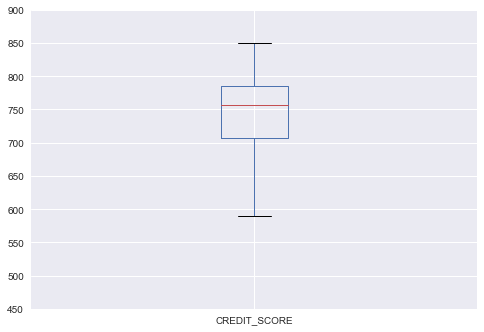

In [31]:
df_orig_specific['CREDIT_SCORE'].plot(kind='box',ylim=((450,900)))
plt.show()

### Average Interest Rate by Quarter

In [66]:
avg_interest = df_yearquartergroup['OG_INTERESTRATE'].mean()

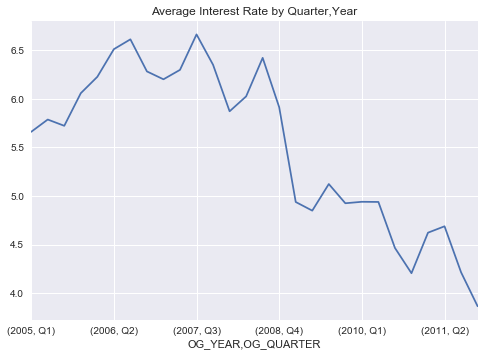

In [93]:
avg_interest.plot(kind='line',title="Average Interest Rate by Quarter,Year")
plt.show()

### Time Series for Average values of LTV, CLTV and DTI

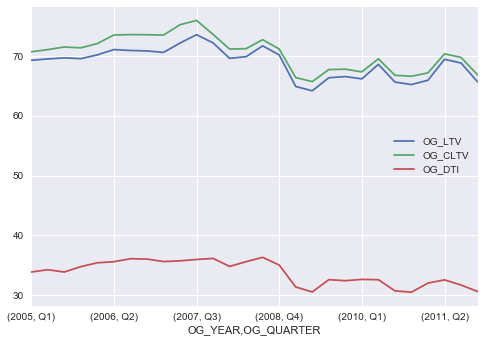

In [393]:
df_yearquartergroup['OG_LTV','OG_CLTV','OG_DTI'].mean().plot(kind='line')
plt.show()

### Total UPB time series

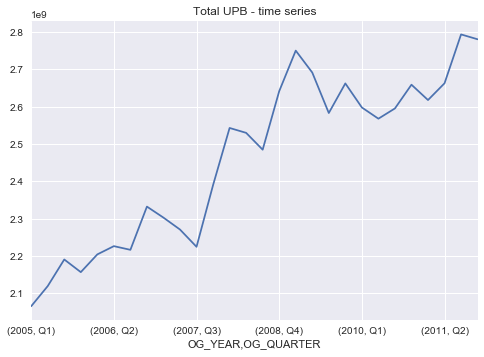

In [894]:
df_yearquartergroup['OG_UPB'].sum().plot(kind='line',title="Total UPB - time series")
plt.show()

### Total UPB Analysis
We can see that the totla UPB value given out by Freddie Mac over the quarters has been steadily increasing. This means that the amount of loans given out by Freddie Mac was not affected by the recession and has steadly increased from 2007 -2009.

## Number of Mortgages by Purpose

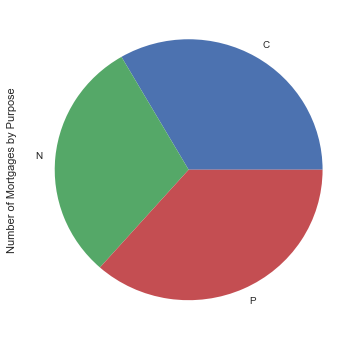

In [897]:
df_orig_purpose_group=df_orig_specific.groupby('LOAN_PURPOSE')
df_count=df_orig_purpose_group.count()
df_avg=df_orig_purpose_group.mean()
series = pd.Series(df_count.LOAN_SEQ_NO, index=[df_count.index], name='Number of Mortgages by Purpose',)
series.plot.pie(figsize=(6, 6),subplots=True,y=df_count.LOAN_SEQ_NO)
plt.show()

## Top Sellers

Well's Fargo was the highest seller of mortgages during the 2005-2011 period

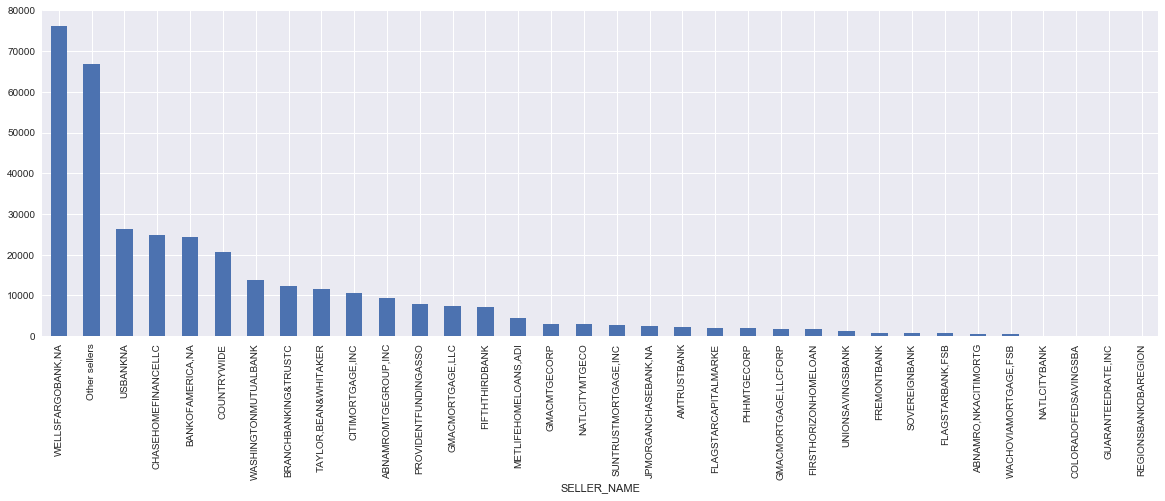

In [110]:
df_orig_specific.groupby('SELLER_NAME')['LOAN_SEQ_NO'].count().sort_values(ascending=False,axis=0).plot(kind='bar',figsize=(20, 6))
plt.show()

### Code for creating Map Plotting Functions

In [191]:
statecodenames = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [685]:
stategroup=df_orig_specific.groupby('PROP_STATE')
df_stateupbcounts=pd.DataFrame([stategroup['OG_UPB'].sum()]).T.reset_index()
df_stateupbcounts['PROP_STATE']=df_stateupbcounts['PROP_STATE'].apply(lambda x: statecodenames[x])
df_stateupbcounts.index=df_stateupbcounts['PROP_STATE']
df_stateupbcounts=df_stateupbcounts[['OG_UPB']]
upbsumdict=df_stateupbcounts.to_dict()['OG_UPB']

In [766]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

# an array of parameters, each of our curves depend on a specific
# value of parameters
def plotcolorbar(minv,maxv):
    parameters = np.linspace(0,10,11)

    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(
        vmin=minv,
        vmax=maxv)

    # choose a colormap
    c_m = plt.get_cmap('Greens')

    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    # plotting 11 sines of varying amplitudes, the colors are chosen

    # having plotted the 11 curves we plot the colorbar, using again our
    # ScalarMappable
    plt.colorbar(s_m)

In [764]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def plotmap(dictvalues,minrange,maxrange):
    fig, ax = plt.subplots()
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    shp_info = m.readshapefile(r'st99_d00','states',drawbounds=True)
    popdensity = dictvalues
    colors={}
    barcolors=[]
    statenames=[]
    cmap = mpl.cm.Greens # use 'hot' colormap
    #cmap = plt.get_cmap('Blues')
    vmin = minrange; vmax = maxrange # set range.
    norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = popdensity[statename]
            colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    ax = plt.gca()
    patches=[]
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:

            if statenames[nshape] == 'Alaska':
            # Alaska is too big. Scale it down to 35% first, then transate it. 
                #print(seg)
                seg = list(map(lambda x: ((0.35*x[0] + 1100000), (0.35*x[1]-1300000)), seg))
            if statenames[nshape] == 'Hawaii':
                seg = list(map(lambda x : (x[0] + 5100000, x[1]-900000), seg))
            color = rgb2hex(colors[statenames[nshape]])
            barcolors.append(color)
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            patches.append(poly)
            ax.add_patch(poly)

    p = PatchCollection(patches, cmap=cmap)
    p.set_array(np.array(barcolors))
    cb1.set_label('Sum of UPB')
    plotcolorbar(vmin,vmax)

### Total UPB by State

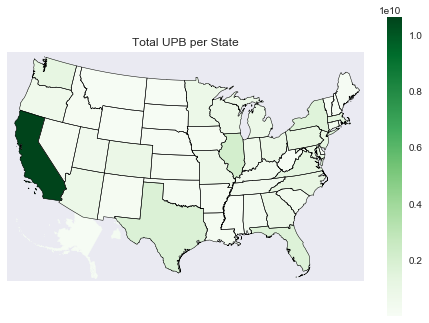

In [767]:
plotmap(upbsumdict,upbsumdict['California'],upbsumdict['Virgin Islands'])
plt.title('Total UPB per State')
plt.show()

### Distribution of Mortgages by Property Type

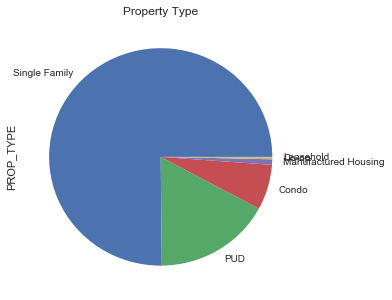

In [385]:
proptypedict={
    "PU":"PUD",
    "LH":"Leasehold",
    "MH":"Manufactured Housing",
    "SF":"Single Family",
    "CP":"Co-op",
    "CO":"Condo",
}
proptype=df_orig_specific['PROP_TYPE'].apply(lambda x : proptypedict[x])
proptype.value_counts().plot(kind='pie',figsize=(5, 5),title='Property Type')
plt.show()

### All Product Types are FRM

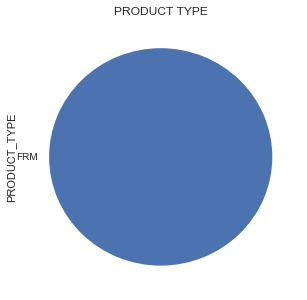

In [436]:
df_orig_specific['PRODUCT_TYPE'].value_counts().plot(kind='pie',figsize=(5, 5),title='PRODUCT TYPE')
plt.show()

### First Time Home Buyers by year

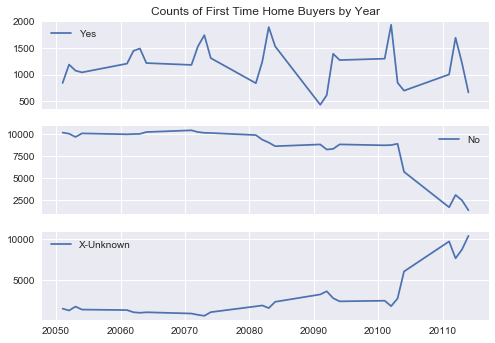

In [588]:
yearquarter_firsthomebuyer=df_orig_specific.groupby(['OG_YEAR','OG_QUARTER','FIRST_HOME_BUYER_FLAG'])
uns=yearquarter_firsthomebuyer['LOAN_SEQ_NO'].count().unstack()
uns
rows=[]
for x,y in uns.index.values:
    rows.append(str(x)+""+str(y)[1])
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(rows, list(uns['Y']))
axarr[0].legend(["Yes"],loc="best")
axarr[1].plot(rows, uns['N'])
axarr[1].legend(["No"],loc="best")
axarr[2].plot(rows, uns['X'],label='X-Unknown')
axarr[0].set_title('Counts of First Time Home Buyers by Year')
plt.legend(loc='best')
plt.show()


### Total UPB by Property Type

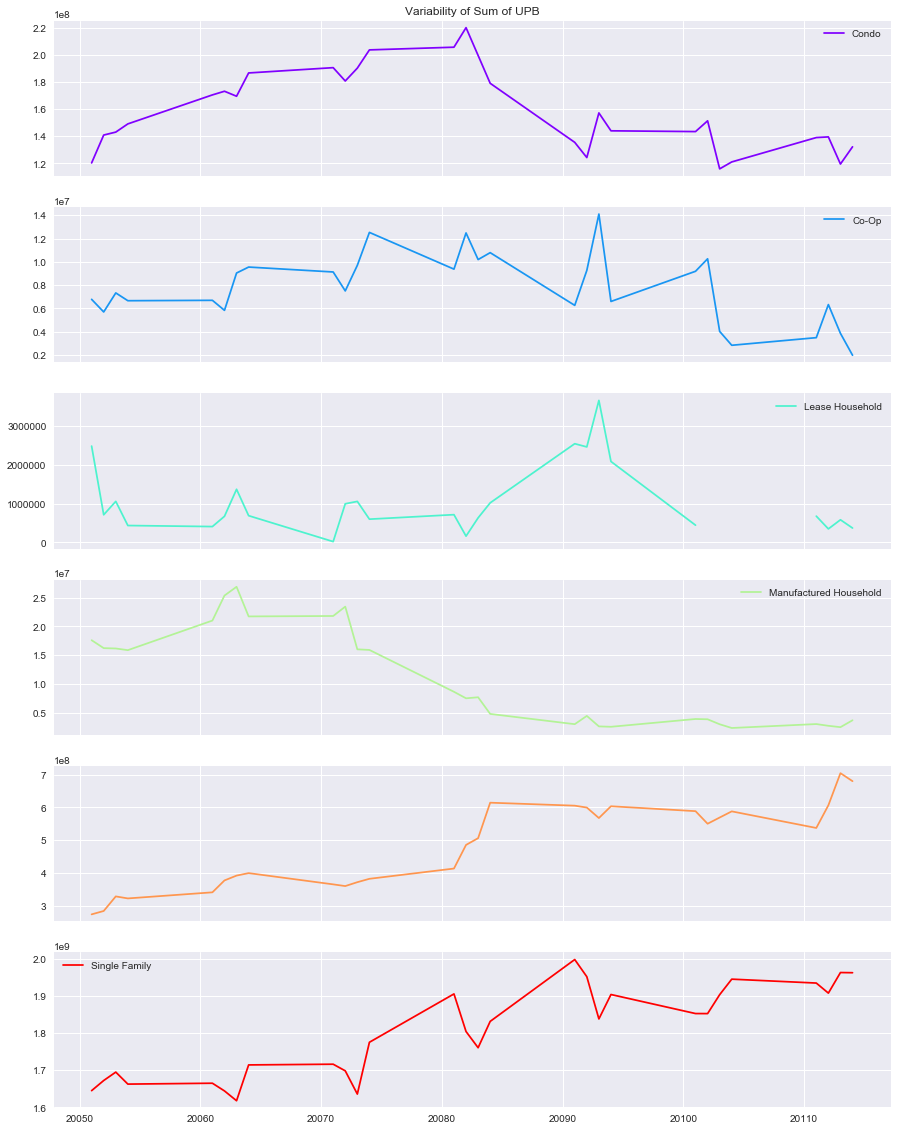

In [592]:
year_quarter_proptype=df_orig_specific.groupby(['OG_YEAR','OG_QUARTER','PROP_TYPE'])
uns=year_quarter_proptype['OG_UPB'].sum().unstack()
uns
rows=[]
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
for x,y in uns.index.values:
    rows.append(str(x)+""+str(y)[1])
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(6, sharex=True,figsize=(15,20))
axarr[0].plot(rows, list(uns['CO']),color=next(colors))
axarr[0].legend(['Condo'],loc="best")
axarr[1].plot(rows, uns['CP'],color=next(colors))
axarr[1].legend(['Co-Op'],loc="best")
axarr[2].plot(rows, uns['LH'],color=next(colors))
axarr[2].legend(["Lease Household"],loc="best")
axarr[3].plot(rows, uns['MH'],color=next(colors))
axarr[3].legend(["Manufactured Household"],loc="best")
axarr[4].plot(rows, uns['PU'],color=next(colors))
axarr[5].legend(["Planned Unit Development"],loc="best")
axarr[5].plot(rows, uns['SF'],color=next(colors))
axarr[5].legend(["Single Family"],loc="best")
axarr[0].set_title('Variability of Sum of UPB')
#plt.legend(handles=[axarr[0],axarr[1],axarr[2],axarr[3],axarr[4],axarr[5]],loc="lower right")
plt.show()

## Correlation Heat Map between different Variables
We can use this for feature selection while running prediction algorithms for linear regression.

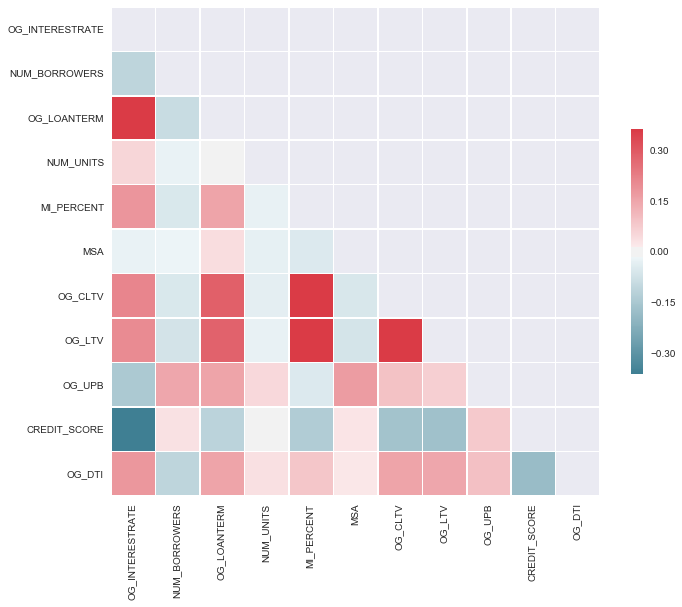

In [594]:
df_coll = df_orig_specific[['OG_INTERESTRATE','NUM_BORROWERS','OG_LOANTERM','NUM_UNITS','MI_PERCENT','MSA','OG_CLTV','OG_LTV','OG_UPB','CREDIT_SCORE','OG_DTI']]
# Compute the correlation matrix
corr = df_coll.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Monthly Performance Files

In [607]:
df_summary=pd.read_csv(MAINPATH+"/"+FILENAMESUMMARY,delimiter=",")
df_summary.head()

,LOAN_SEQ_NO,MAX_CUR_ACT_UPB,MIN_CUR_ACT_UPB,MAX_CUR_LOAN_DELQ_STAT,MIN_CUR_LOAN_DELQ_STAT,MAX_CURR_INTERESTRATE,MIN_CURR_INTERESTRATE,MAX_MONTHLY_REPORT_PERIOD,MIN_MONTHLY_REPORT_PERIOD,MAX_LOAN_AGE,MIN_LOAN_AGE,MAX_MONTHS_LEGAL_MATURITY,MIN_MONTHS_LEGAL_MATURITY,REPURCHASED,MAX_ZERO_BAL_CODE,MIN_ZERO_BAL_CODE,MAX_CURR_DEF_UPB,MIN_CURR_DEF_UPB,MAX_MI_RECOVERIES,MIN_MI_RECOVERIES,MAX_NON_MI_RECOV,MIN_NON_MI_RECOV,MAX_EXPENSES,MIN_EXPENSES,MAX_LEGAL_COSTS,MIN_LEGAL_COSTS,MAX_TAX_INSUR,MIN_TAX_INSUR,MAX_ACT_LOSS_CALC,MIN_ACT_LOSS_CALC,MAX_MOD_COST,MIN_MOD_COST
0,F105Q1000064,62000.0,0.0,0,0,5.750,5.750,2009-01-01,2005-01-01,57,0,360,303,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F105Q1000076,197000.0,0.0,0,0,5.250,5.250,2010-01-01,2005-01-01,69,0,360,291,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F105Q1000087,100000.0,0.0,1,0,5.750,5.750,2006-01-01,2005-01-01,18,0,360,342,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F105Q1000130,334000.0,0.0,0,0,5.875,5.875,2013-01-01,2005-01-01,105,0,360,255,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F105Q1000195,125000.0,0.0,0,0,5.875,5.875,2011-01-01,2005-01-01,81,0,360,279,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Grouping based on Year and Quarter for the monthly performance data

In [652]:
df_joined_yearquartergroup=df_joined_specific.groupby(['OG_YEAR','OG_QUARTER'])

## Average Delinquents by Quarter

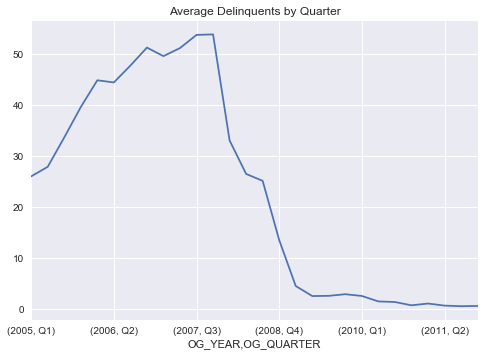

In [656]:
df_joined_yearquartergroup['MAX_CUR_LOAN_DELQ_STAT'].mean().plot(kind='line',title='Average Delinquents by Quarter')
plt.show()

#### Maximum delinquents during 2007
In the above plot, we can see that the highest average delinquents were during the 3rd quarter of 2007. This was the main cause of the financial market crash

### Plotting Delinquents by State

In [665]:
perf_summ_stategroup=df_joined_specific.groupby('PROP_STATE')
df_perf_statedelinquents=pd.DataFrame([perf_summ_stategroup['MAX_CUR_LOAN_DELQ_STAT'].sum()]).T.reset_index()
df_perf_statedelinquents['PROP_STATE']=df_perf_statedelinquents['PROP_STATE'].apply(lambda x: statecodenames[x])
df_perf_statedelinquents.index=df_perf_statedelinquents['PROP_STATE']
df_perf_statedelinquents=df_perf_statedelinquents[['MAX_CUR_LOAN_DELQ_STAT']]
delnqsumdict=df_perf_statedelinquents.to_dict()['MAX_CUR_LOAN_DELQ_STAT']

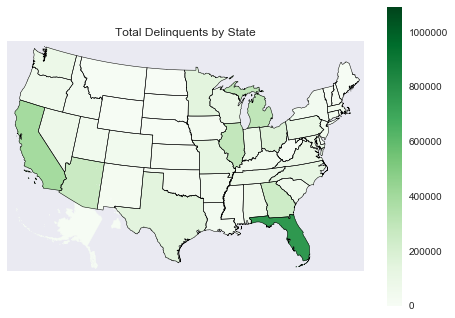

In [770]:
plotmap(delnqsumdict,delnqsumdict['Florida']+100000,delnqsumdict['Alaska']-10000)
plt.title('Total Delinquents by State')
plt.show()

### Delinquent loans analysis
We know from history, that the major mortgage delinquent cases came from Florida. That's what triggered a nationwide recession. The data for Freddie Mac proves this fact. As we can see, the maximum number of delinquents were from Florida.

### Correlation between variables

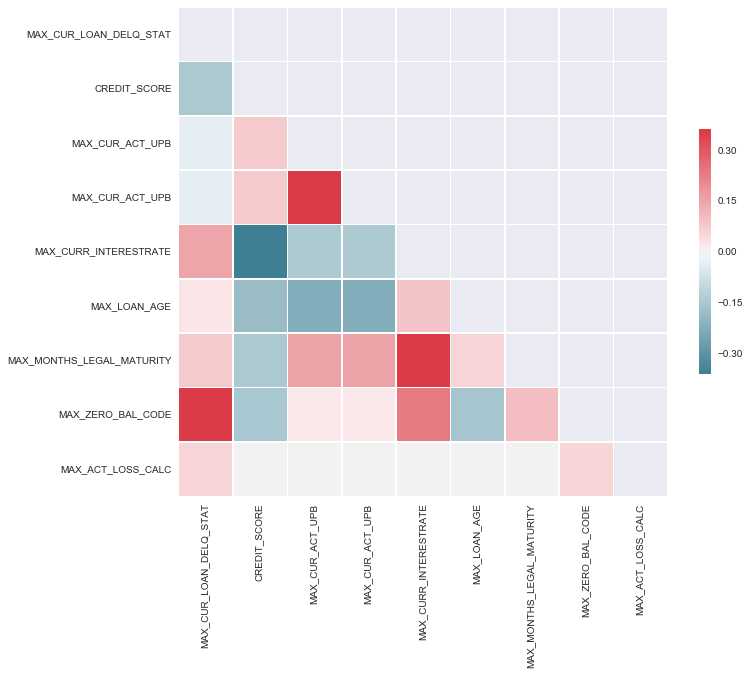

In [777]:
df_coll = df_joined_specific[['MAX_CUR_LOAN_DELQ_STAT','CREDIT_SCORE','MAX_CUR_ACT_UPB','MAX_CUR_ACT_UPB','MAX_CURR_INTERESTRATE','MAX_LOAN_AGE','MAX_MONTHS_LEGAL_MATURITY','MAX_ZERO_BAL_CODE','MAX_ACT_LOSS_CALC']]
# Compute the correlation matrix
corr = df_coll.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Number of Delinquents by Credit Score

Checking relation between credit score and number of delinquents.

In [876]:
bins=[0,299]
for n in np.arange(300, 850, 50):
    bins.append(n)
bins.append(851)
bins.append(1000)

creddel_df = pd.DataFrame(df_joined_specific[['CREDIT_SCORE','DELINQUENT','MAX_CUR_LOAN_DELQ_STAT']])
creddel_df
creddel_df['CREDIT_SCORE']=pd.cut(creddel_df['CREDIT_SCORE'], bins)
creddel_dfgroup=creddel_df.groupby(['CREDIT_SCORE','DELINQUENT']).count().unstack().T.unstack().T.reset_index()

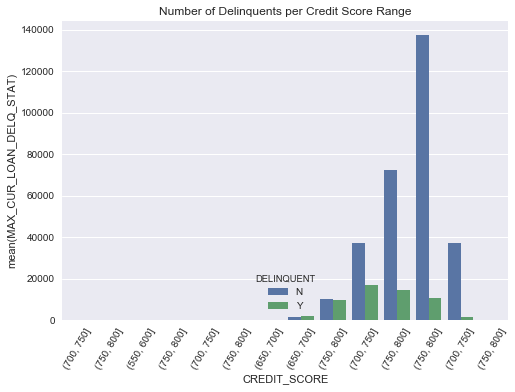

In [877]:
g=sns.barplot(x="CREDIT_SCORE", y='MAX_CUR_LOAN_DELQ_STAT', hue="DELINQUENT", data=creddel_dfgroup);
g.set_xticklabels(labels=creddel_df['CREDIT_SCORE'],rotation=60)
plt.title("Number of Delinquents per Credit Score Range")
plt.figsize=(60,60)
plt.show()

### Credit scores with Delinquents Analysis
**Mortgages given to borrowers with Lower Credit Scores have a higher chance of Default**


### Losses incurred by Freddie Mac time series

From the below plot, it is clearly evident that Freddie Mac started taking heavy losses from the Q3 of 2006 which built up to the recession. After the recession, Freddie mac revised it's strategies and the losses fell down drammatically.

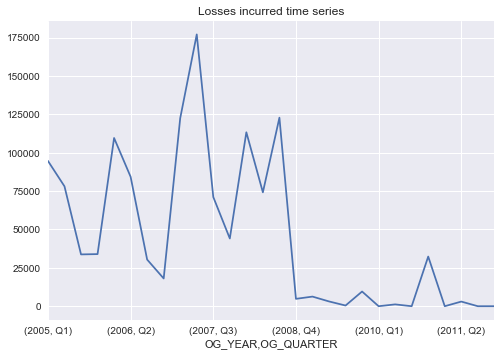

In [892]:
df_joined_yearquartergroup['MAX_ACT_LOSS_CALC'].sum().plot(kind='line',title="Losses incurred time series")
plt.show()